## Trajectory Prediction by Interpolation

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt

# Load the data
red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_15h51m.csv', delimiter=',', decimal='.')
red_ball_fill.shape

(1228, 14)

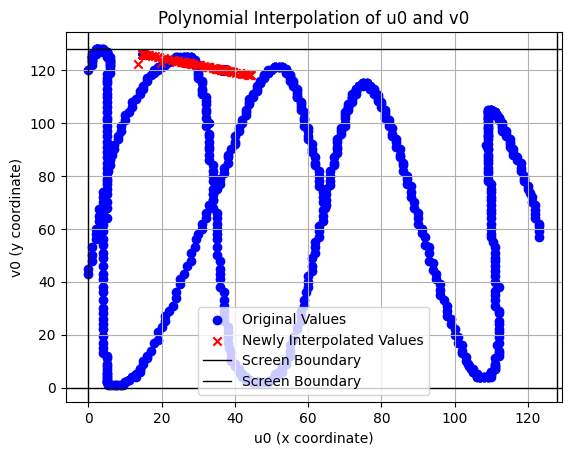

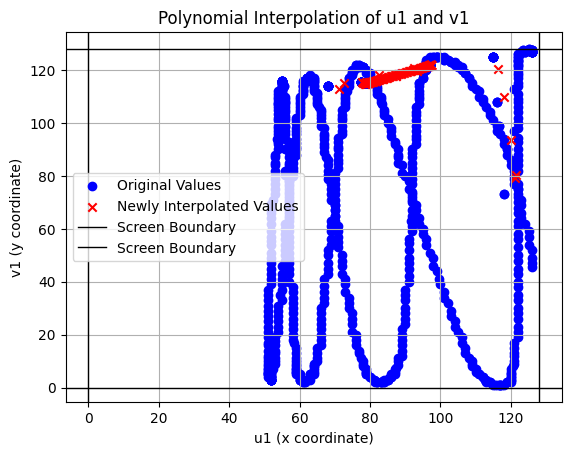

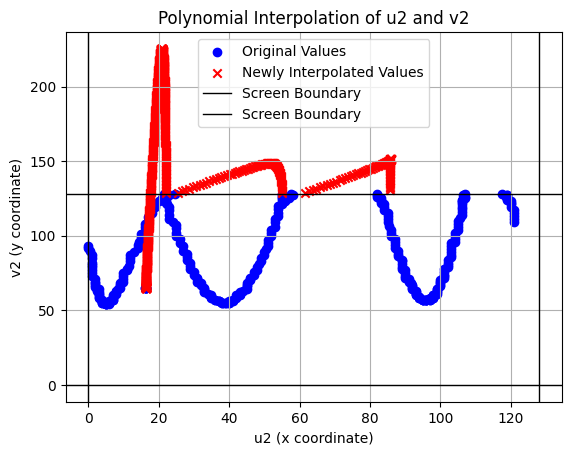

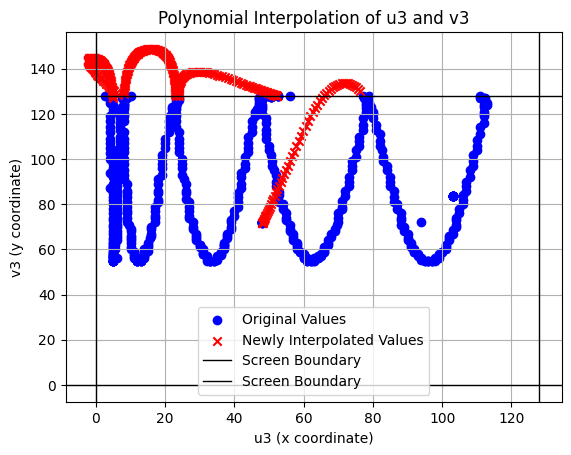

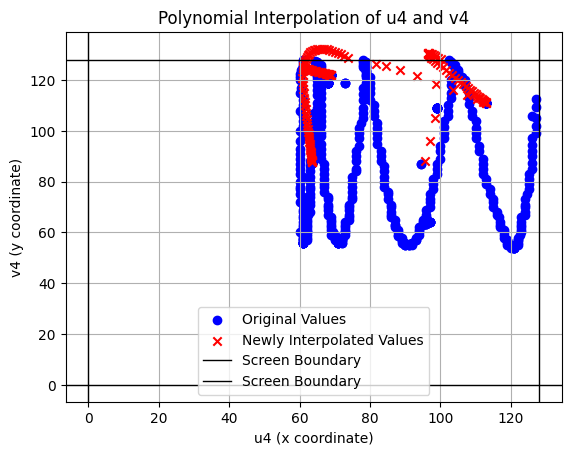

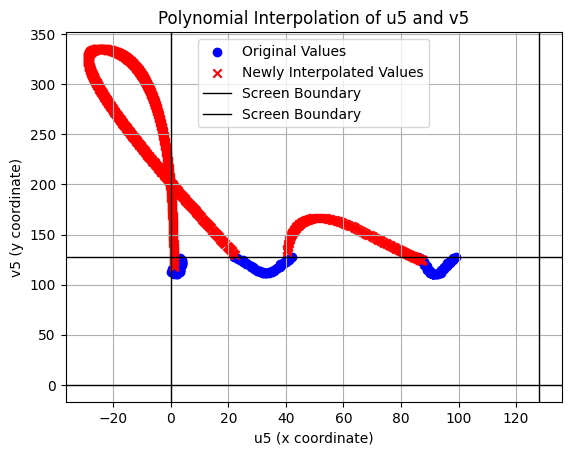

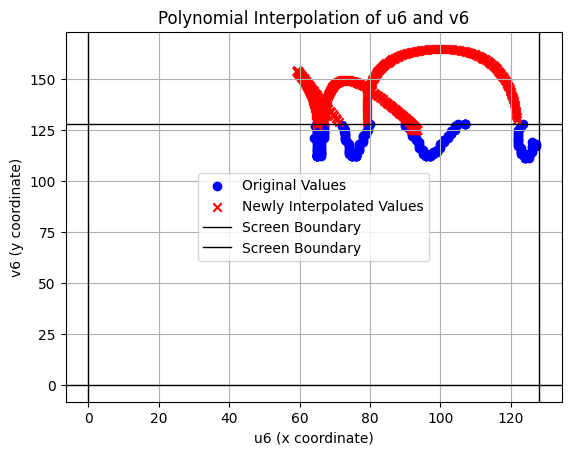

In [2]:

# Number of cameras
num_cameras = 7
result_df = red_ball_fill.copy()

# Loop through each pair of 'u' and 'v'
for i in range(num_cameras):
    col_u = f'u{i}'
    col_v = f'v{i}'

    # Extract the columns 'u' and 'v' for the current pair
    X_0 = red_ball_fill[[col_u, col_v]]

    # Create a copy to keep non-NaN rows
    X_0_copy = X_0.copy()

    X_0_nan = X_0_copy[X_0_copy.isna().any(axis=1)]

    # Drop NaN rows for z-score calculation
    X_0_non_nan = X_0.dropna()

    # Apply Isolation Forest to detect outliers
    model = IsolationForest(contamination=float(0.2), max_samples='auto')
    model.fit(X_0_non_nan)
    outliers_mask = model.predict(X_0_non_nan) == -1

    # Drop rows identified as outliers
    for index in X_0_copy.index:
        if index in X_0_non_nan.index[outliers_mask]:
            X_0_copy = X_0_copy.drop(index)

    # Interpolate missing values
    X_0_copy.interpolate(method='polynomial', order=2, inplace=True)

    # Fill NaN values in the original DataFrame with the interpolated values
    X_0_nan = X_0_nan.fillna(X_0_copy)

    # Apply KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    X_0_copy = X_0_copy.to_numpy()
    X_0_copy = imputer.fit_transform(X_0_copy)

    # Convert X_0_copy back to a DataFrame
    X_0_copy = pd.DataFrame(X_0_copy, columns=[col_u, col_v])

    # Find the indices of NaN rows in the original DataFrame red_ball_fill
    nan_indices = X_0_nan.index
    result_df.loc[nan_indices, [col_u, col_v]] = X_0_copy[[col_u, col_v]]
    # Replace the corresponding rows in red_ball_fill with the imputed values from X_0_copy
    red_ball_fill.loc[nan_indices, [col_u, col_v]] = X_0_copy[[col_u, col_v]]

    # Plot the results for the current pair
    plt.scatter(X_0[col_u], X_0[col_v], c='blue', marker='o', label='Original Values')
    plt.scatter(X_0_nan[col_u], X_0_nan[col_v], c='red', marker='x', label='Newly Interpolated Values')

    # Add lines to represent the screen boundaries
    plt.axvline(x=128, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=128, color='black', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=0, color='black', linewidth=1)

    plt.title(f'Polynomial Interpolation of {col_u} and {col_v}')
    plt.xlabel(f'{col_u} (x coordinate)')
    plt.ylabel(f'{col_v} (y coordinate)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [3]:
red_ball_fill.isna().sum()

u0      0
v0      0
u1     27
v1     27
u2     50
v2     50
u3    115
v3    115
u4    112
v4    112
u5     27
v5     27
u6     38
v6     38
dtype: int64

In [4]:
#result_df.to_csv('../interpolated-data/red_ball_coordinates_128px_024_interpolated.csv', index=False)

### Restructure the interpolation process
- Use Isolation Forest to detect all outliers so the interpolation works better
- Use Polynomial Interpolation to fill in the missing values
- Remove all the rows where the values are still NaN

In [5]:
red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_15h51m.csv', delimiter=',', decimal='.')
red_ball_fill.shape

(1228, 14)

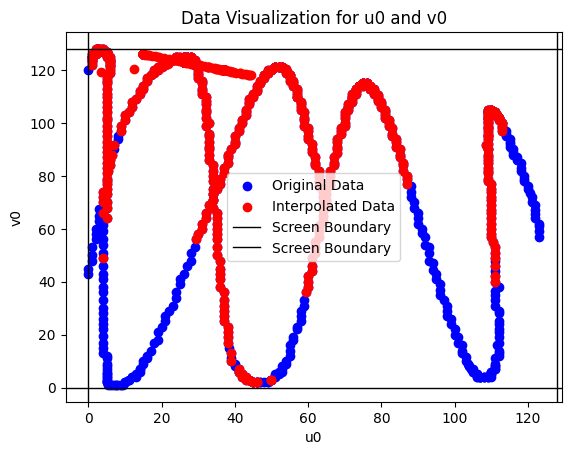

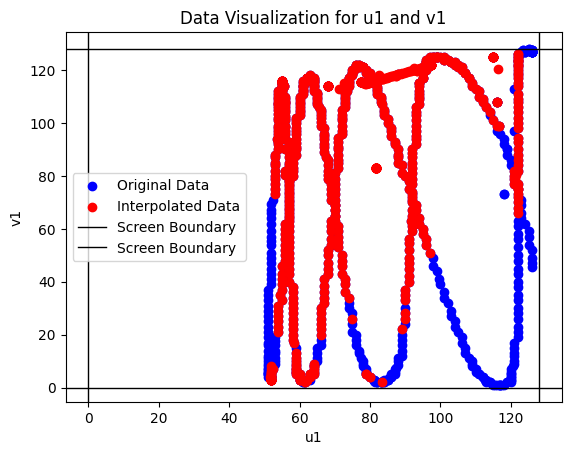

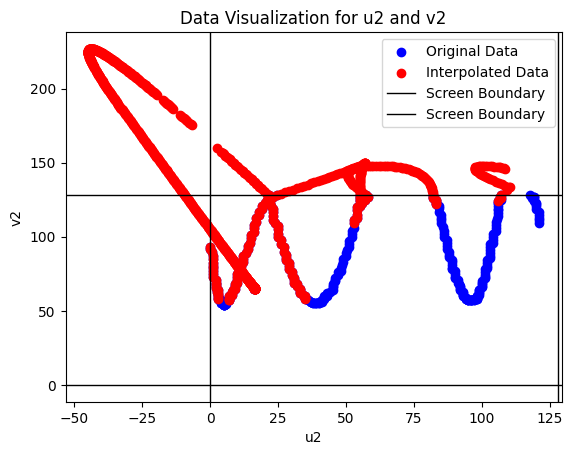

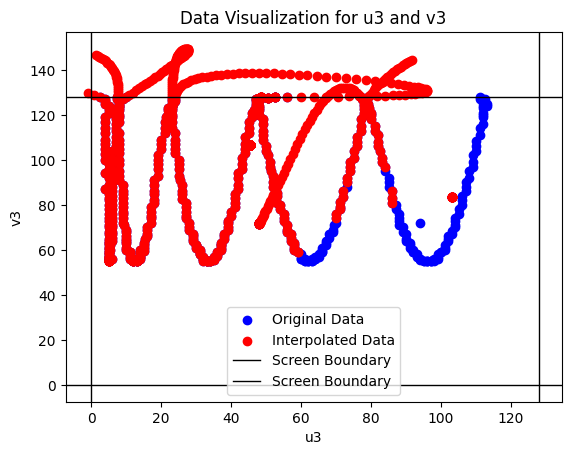

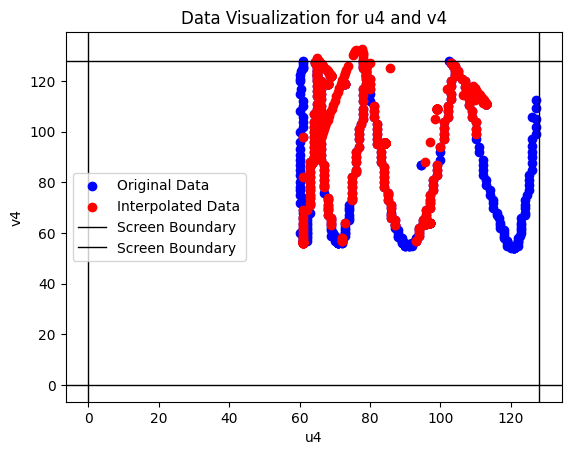

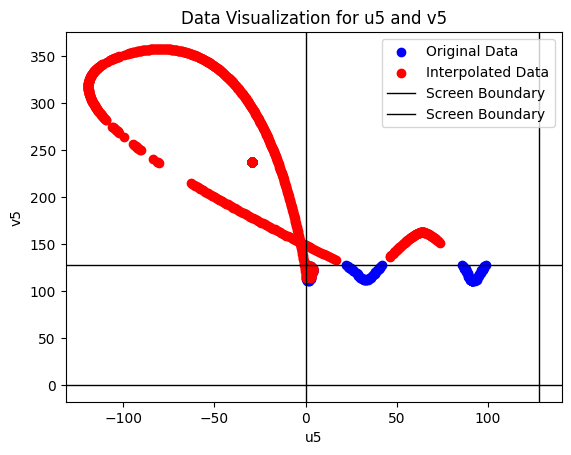

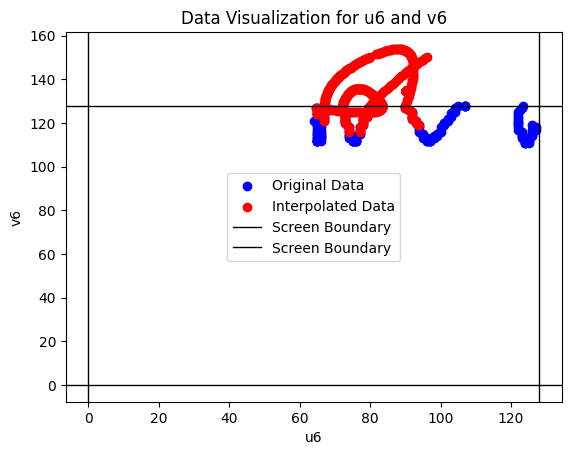

In [6]:

# Number of cameras
num_cameras = 7
result_df = red_ball_fill.copy()

# Loop through each pair of 'u' and 'v'
for i in range(num_cameras):
    col_u = f'u{i}'
    col_v = f'v{i}'

    # Extract the columns 'u' and 'v' for the current pair
    X_0 = red_ball_fill[[col_u, col_v]]
    X_0_original = X_0.copy()
    # do interpolation on the original data
    X_0_original = X_0_original.interpolate(method='polynomial', order=2)
    imputer_knn = KNNImputer(n_neighbors=5)
    X_0_original.to_numpy()
    X_0_original = imputer_knn.fit_transform(X_0_original)
    X_0_original = pd.DataFrame(X_0_original, columns=[col_u, col_v])
    # the outliers are removed from the data
    model_iso = IsolationForest(contamination=0.2)
    model_iso.fit(X_0_original)
    outliers_mask = model_iso.predict(X_0_original) == -1
    X_0_original = X_0_original[~outliers_mask]
    # Plot the original data in blue
    plt.scatter(X_0[col_u], X_0[col_v], color='blue', label='Original Data')
    
    # Plot the interpolated/red data in red
    plt.scatter(X_0_original[col_u], X_0_original[col_v], color='red', label='Interpolated Data')
    plt.axvline(x=128, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=128, color='black', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=0, color='black', linewidth=1)
    # Customize the plot
    plt.title(f'Data Visualization for {col_u} and {col_v}')
    plt.xlabel(col_u)
    plt.ylabel(col_v)
    plt.legend()
    
    # Show the plot
    plt.show()

#### Do Interpolation for X and Y coordinates separately

In [7]:
red_ball_fill = pd.read_csv('../data/data-spirograph/red_ball_coordinates_128px_2024-03-07_21h40m.csv', delimiter=',', decimal='.')
red_ball_fill.shape

(1015, 14)

The number of NaN values in u0 before interpolation is 0
The number of NaN values in u0 after interpolation is 0
The number of NaN values in u0 after KNN imputation is 0


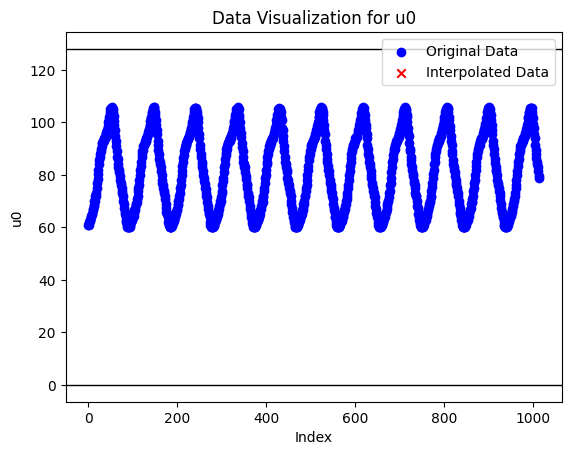

The number of NaN values in v0 before interpolation is 0
The number of NaN values in v0 after interpolation is 0
The number of NaN values in v0 after KNN imputation is 0


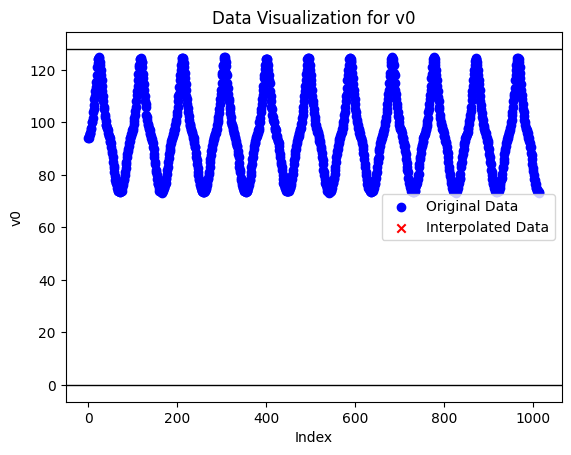

The number of NaN values in u1 before interpolation is 102
The number of NaN values in u1 after interpolation is 0
The number of NaN values in u1 after KNN imputation is 0


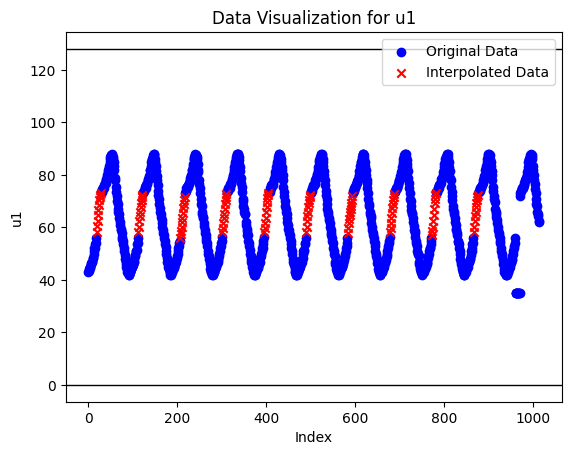

The number of NaN values in v1 before interpolation is 102
The number of NaN values in v1 after interpolation is 0
The number of NaN values in v1 after KNN imputation is 0


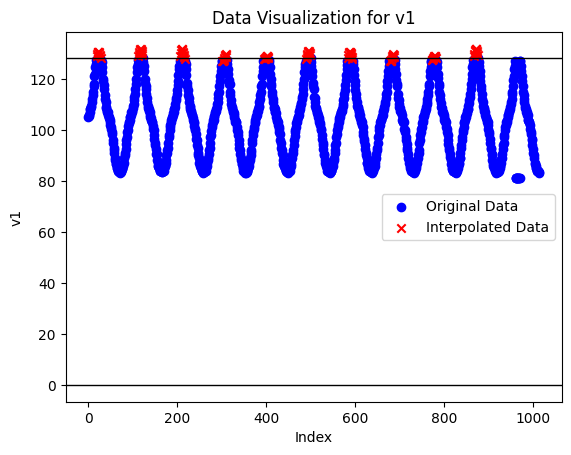

The number of NaN values in u2 before interpolation is 1
The number of NaN values in u2 after interpolation is 0
The number of NaN values in u2 after KNN imputation is 0


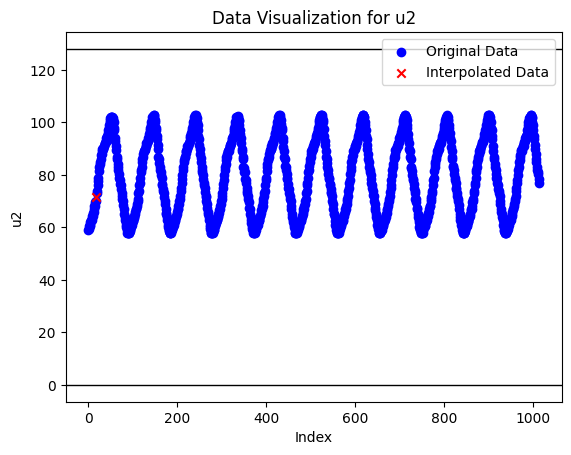

The number of NaN values in v2 before interpolation is 1
The number of NaN values in v2 after interpolation is 0
The number of NaN values in v2 after KNN imputation is 0


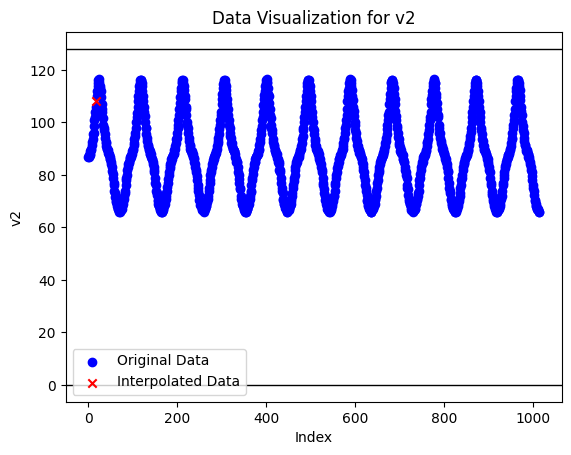

The number of NaN values in u3 before interpolation is 0
The number of NaN values in u3 after interpolation is 0
The number of NaN values in u3 after KNN imputation is 0


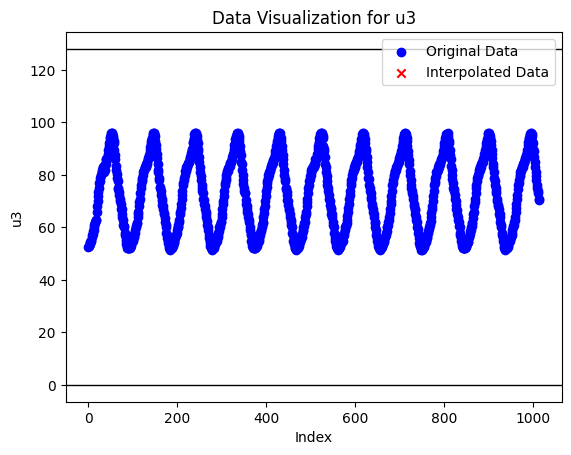

The number of NaN values in v3 before interpolation is 0
The number of NaN values in v3 after interpolation is 0
The number of NaN values in v3 after KNN imputation is 0


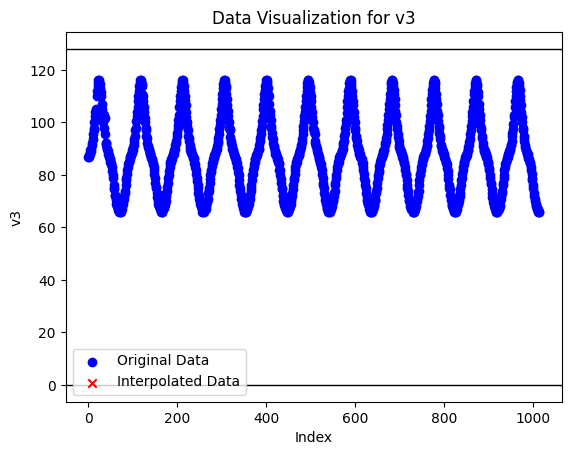

The number of NaN values in u4 before interpolation is 1
The number of NaN values in u4 after interpolation is 0
The number of NaN values in u4 after KNN imputation is 0


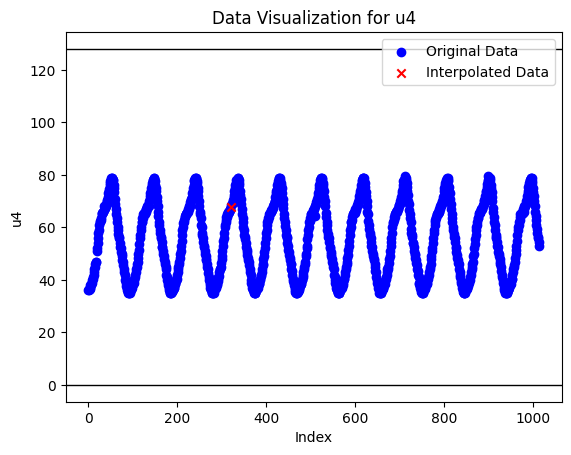

The number of NaN values in v4 before interpolation is 1
The number of NaN values in v4 after interpolation is 0
The number of NaN values in v4 after KNN imputation is 0


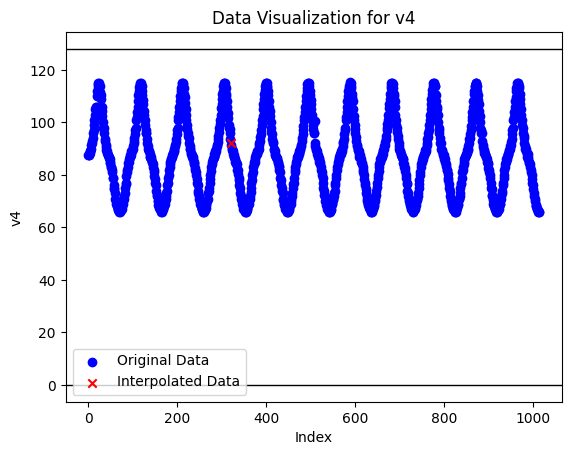

The number of NaN values in u5 before interpolation is 1
The number of NaN values in u5 after interpolation is 0
The number of NaN values in u5 after KNN imputation is 0


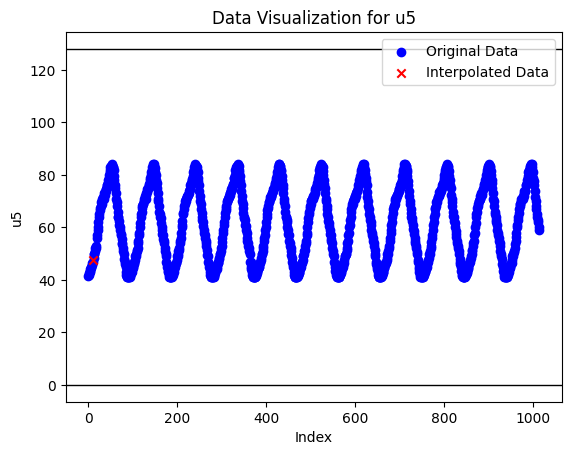

The number of NaN values in v5 before interpolation is 1
The number of NaN values in v5 after interpolation is 0
The number of NaN values in v5 after KNN imputation is 0


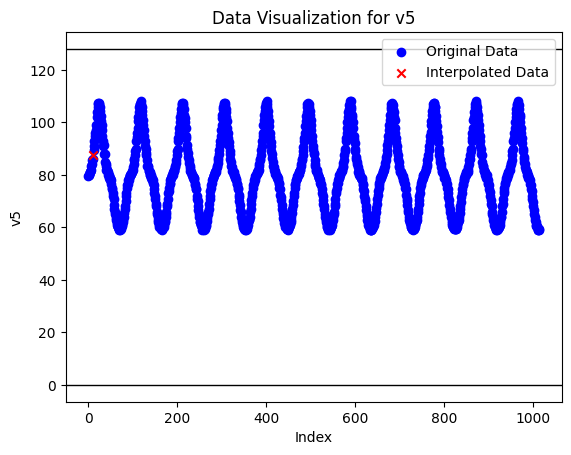

The number of NaN values in u6 before interpolation is 1
The number of NaN values in u6 after interpolation is 0
The number of NaN values in u6 after KNN imputation is 0


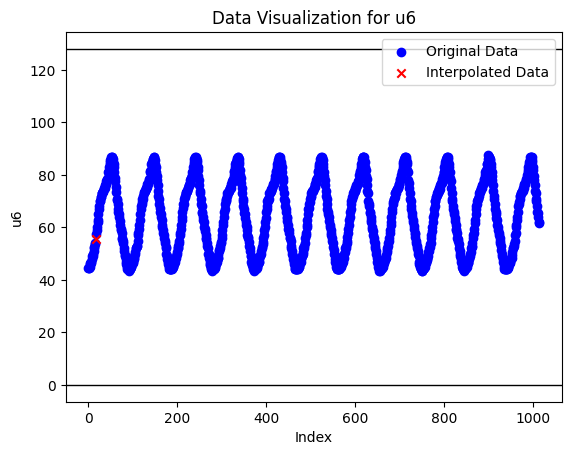

The number of NaN values in v6 before interpolation is 1
The number of NaN values in v6 after interpolation is 0
The number of NaN values in v6 after KNN imputation is 0


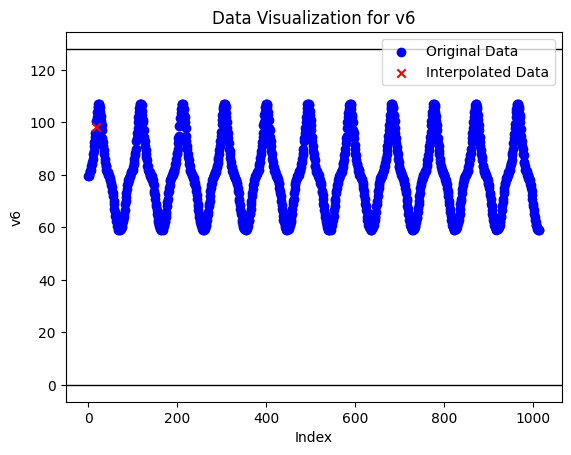

In [8]:

# Number of cameras
num_cameras = 7
result_df = red_ball_fill.copy()
new_data = pd.DataFrame()
# Loop through each pair of 'u' and 'v'
for col in red_ball_fill.columns:
    data = red_ball_fill[col].copy()
    original_indices = data.index
    original_values = data.values
    # get all the rows with NaN values
    data_nan = data[data.isna()]
    print(f'The number of NaN values in {col} before interpolation is {data.isna().sum()}')
    data = data.interpolate(method='polynomial', order=2)
    data_nan = data_nan.fillna(data)
    print(f'The number of NaN values in {col} after interpolation is {data.isna().sum()}')
    imputer_knn = KNNImputer(n_neighbors=2)
    data = data.values.reshape(-1, 1)
    data = imputer_knn.fit_transform(data)
    data = data.flatten()
    data = pd.DataFrame(data, columns=[col])
    # combine the original data with the interpolated data

    new_data = pd.concat([new_data, data], axis=1)
    print(f'The number of NaN values in {col} after KNN imputation is {data.isna().sum().values[0]}')
    plt.scatter(original_indices, original_values, color='blue', marker='o', label='Original Data')

    # Plot interpolated values in red crosses
    plt.scatter(data_nan.index, data_nan, color='red', marker='x', label='Interpolated Data')
    plt.axhline(y=128, color='black', linewidth=1)
    plt.axhline(y=0, color='black', linewidth=1)
    # Customize the plot
    plt.title(f'Data Visualization for {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()

    # Show the plot
    plt.show()

In [9]:
new_data

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,61.0,94.0,43.0,105.0,59.0,87.0,52.5,87.0,36.0,87.5,41.5,79.5,44.5,79.5
1,61.0,94.0,43.5,105.5,59.5,87.0,53.0,87.0,36.0,87.5,42.0,80.0,44.5,79.5
2,62.0,95.0,44.0,106.0,60.5,87.5,53.0,87.5,36.5,87.5,42.5,80.0,44.5,80.0
3,62.5,95.5,44.5,107.0,60.5,87.5,53.5,88.0,36.5,88.5,43.0,81.0,45.0,81.0
4,63.0,96.0,45.0,108.0,61.0,88.0,54.5,88.5,37.0,89.0,43.5,81.0,46.0,81.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,84.0,74.0,66.0,84.0,82.0,67.0,75.0,67.0,58.0,67.0,64.0,60.0,66.0,59.5
1011,83.0,74.0,65.0,84.0,81.0,67.0,74.0,66.0,56.5,66.5,63.0,59.0,65.5,59.5
1012,81.5,73.5,64.5,84.0,80.5,66.5,73.0,67.0,56.0,66.0,62.0,59.0,64.0,59.0
1013,79.0,73.0,62.0,83.0,77.0,66.0,70.5,66.0,53.0,66.0,59.0,59.5,61.5,59.0


In [13]:
new_data.to_csv('../data/data-spirograph/red_ball_coordinates_128px_2024-03-07_21h40m_interpolated.csv', index=False, header=True)

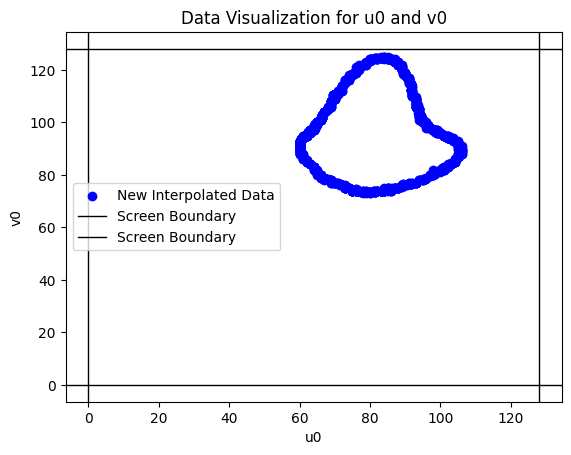

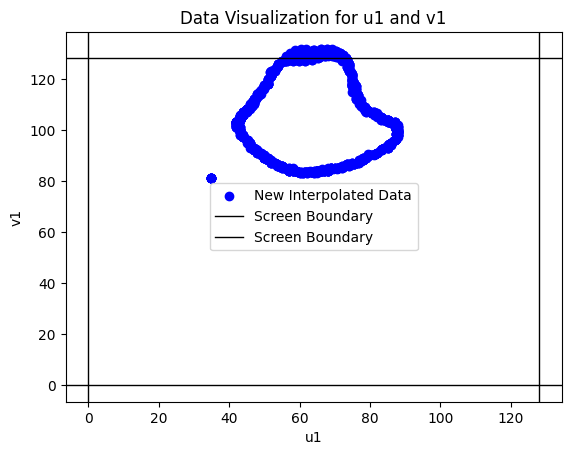

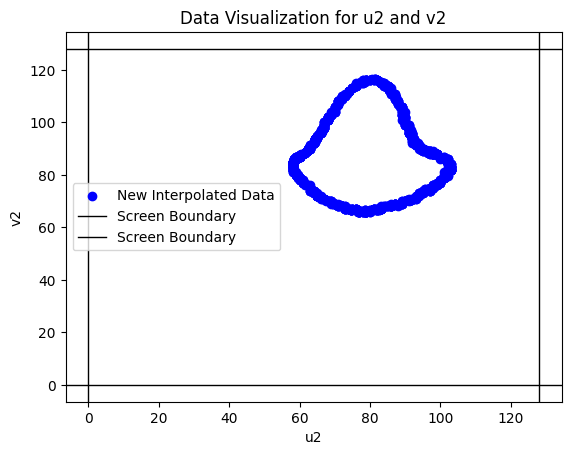

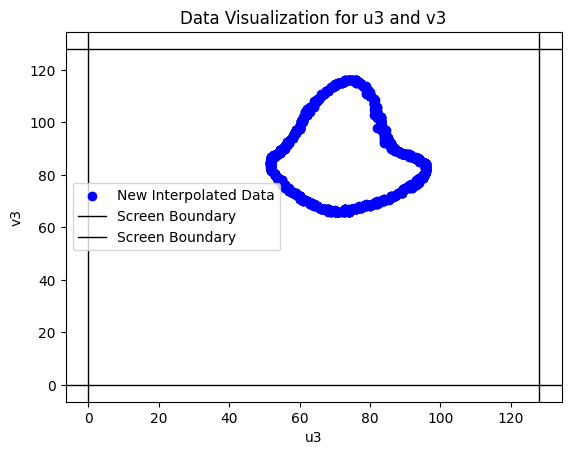

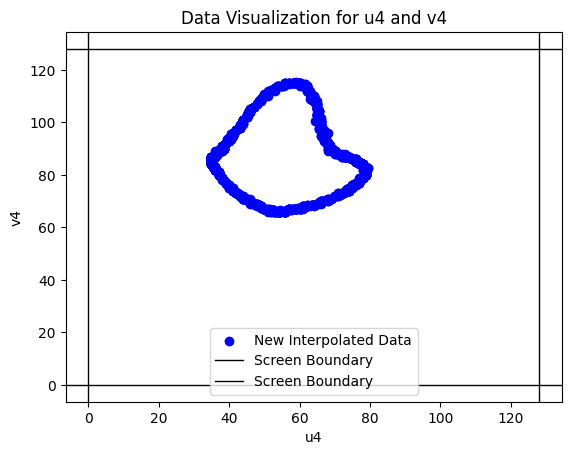

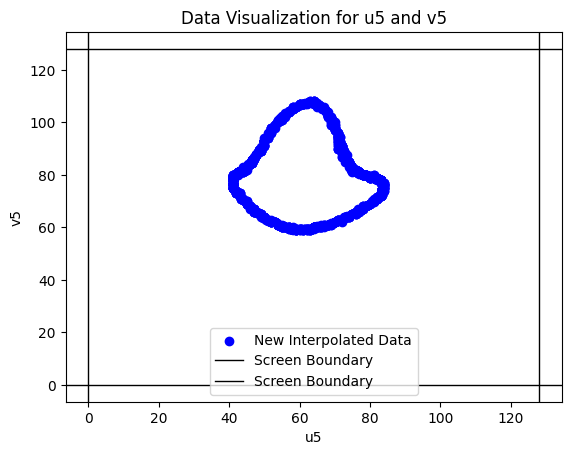

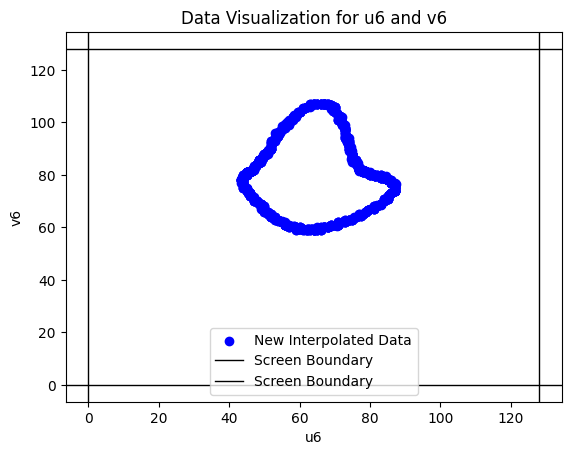

In [11]:
# show the data by camera
for i in range(7):
    col_u = f'u{i}'
    col_v = f'v{i}'
    plt.scatter(new_data[col_u], new_data[col_v], color='blue', marker='o', label='New Interpolated Data')
    plt.axvline(x=128, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=128, color='black', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=0, color='black', linewidth=1)
    plt.title(f'Data Visualization for {col_u} and {col_v}')
    plt.xlabel(col_u)
    plt.ylabel(col_v)
    plt.legend()
    plt.show()